<a href="https://colab.research.google.com/github/ArchitGupta-IITB/StockMarket-ARIMA-Model-/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my final Project submission of the SOC

This is the only presereved notebook I have with me regarding this project 

Installing the necessary libraries to work with

In [1]:
pip install numpy pandas matplotlib yfinance statsmodels pmdarima --quiet

     |████████████████████████████████| 1.4 MB 7.9 MB/s 
     |████████████████████████████████| 6.4 MB 50.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 9.8 MB 42.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install -U statsmodels --quiet

Importing them

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima

Downloading data for 6 months

[*********************100%***********************]  1 of 1 completed


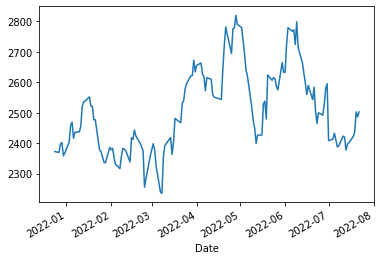

In [5]:
rel_6m= yf.download("RELIANCE.NS",start="2021-12-24",end="2022-07-24")
rel_6m["Close"].plot()

Downloading data for 1 year

[*********************100%***********************]  1 of 1 completed


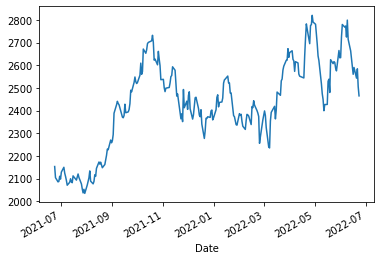

In [6]:
rel_1y= yf.download("RELIANCE.NS",start="2021-06-24",end="2022-06-24")
rel_1y["Close"].plot()

Making sure the data is continuous and of required format

This is because handling NaN is difficult for the program

In [7]:
rel_6m[rel_6m.isna().any(axis=1)]
rel_6m["Index"]=range(0,len(rel_6m))
rel_6m.set_index(keys=["Index"],inplace=True)
rel_6m1=rel_6m.dropna()
rel_1y[rel_1y.isna().any(axis=1)]
rel_1y["Index"]=range(0,len(rel_1y))
rel_1y.set_index(keys=["Index"],inplace=True)
rel_1y1=rel_1y.dropna()
rel_6m2=rel_6m1.groupby('Index')[['Close']].mean()
rel_1y2=rel_1y1.groupby('Index')[['Close']].mean()

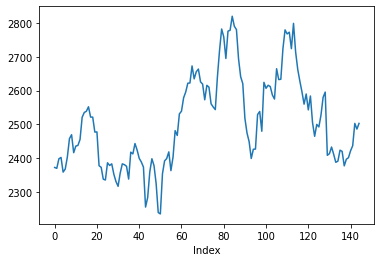

In [8]:
rel_6m2["Close"].plot()

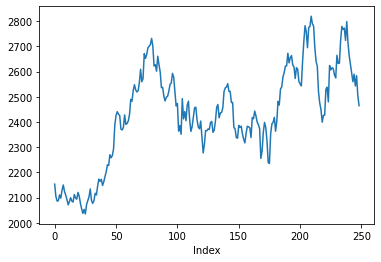

In [9]:
rel_1y2["Close"].plot()

Plotting the PACF and ACF graphs

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


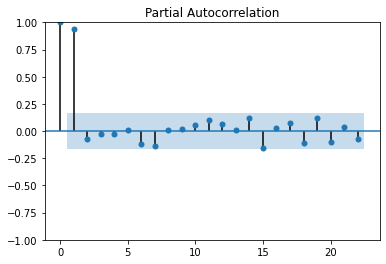

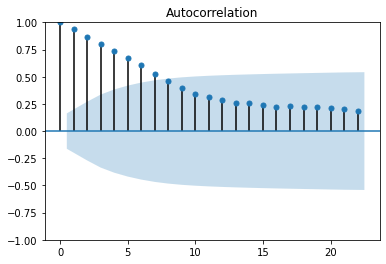

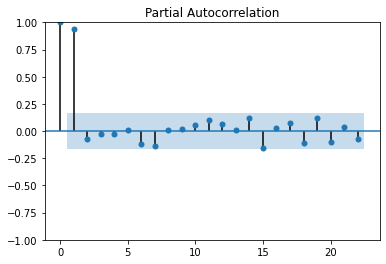

In [11]:
sm.graphics.tsa.plot_acf(rel_6m2)
sm.graphics.tsa.plot_pacf(rel_6m2)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


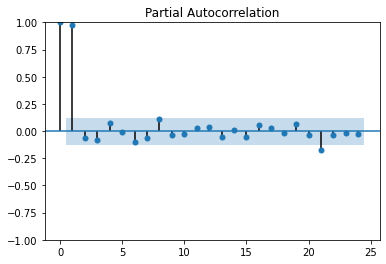

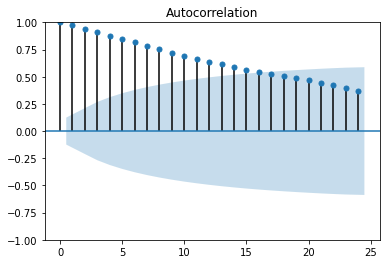

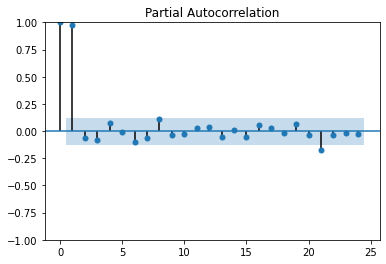

In [12]:
sm.graphics.tsa.plot_acf(rel_1y2)
sm.graphics.tsa.plot_pacf(rel_1y2)

Doing the adfullrer test to ensure that data is stationary

In [13]:
adfuller(rel_6m2['Close'])

(-2.2447736986734457,
 0.19039815200235738,
 0,
 144,
 {'1%': -3.476597917537401,
  '10%': -2.5775887982253085,
  '5%': -2.8818291230495543},
 1380.2601383345382)

In [14]:
adfuller(rel_1y2['Close'])

(-2.032876630469023,
 0.2723464276637104,
 0,
 248,
 {'1%': -3.4569962781990573,
  '10%': -2.573018897632674,
  '5%': -2.8732659015936024},
 2406.2058826717985)

ARIMA model needs stationary data which needs 2nd element to be less than 0.05. 
Using first difference to calculate the same

In [15]:
rel_6m2['Close_Difference']=rel_6m2['Close']-rel_6m2['Close'].shift(1)
rel_6m2['Close'].shift(1)
adfuller(rel_6m2["Close_Difference"].dropna())

(-11.504233032619918,
 4.415705644988403e-21,
 0,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 1374.6656672974418)

In [16]:
rel_1y2['Close_Difference']=rel_1y2['Close']-rel_1y2['Close'].shift(1)
rel_1y2['Close'].shift(1)
rel_1y2
adfuller(rel_1y2['Close_Difference'].dropna())

(-15.434616451631989,
 2.9181366048244936e-28,
 0,
 247,
 {'1%': -3.457105309726321,
  '10%': -2.5730443824681606,
  '5%': -2.873313676101283},
 2402.2319188202864)

Plotting the difference graph to make sure that data is stationary

Text(0, 0.5, 'Price')

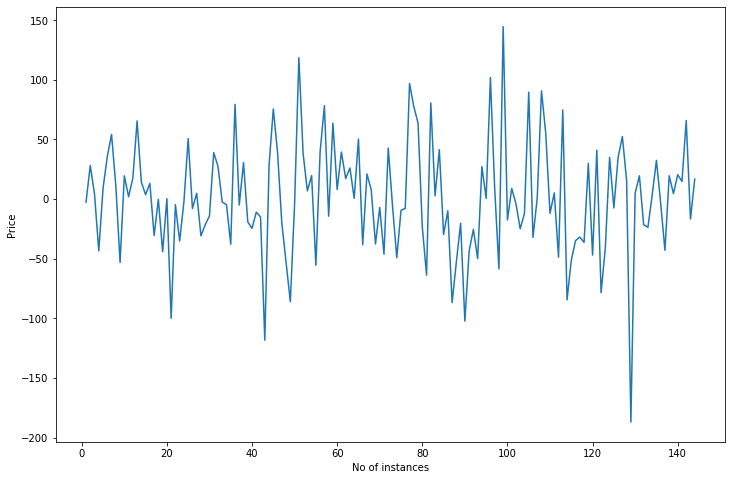

In [18]:
rel_6m2['Close_Difference'].plot(figsize=(12,8))
plt.xlabel("No of instances")
plt.ylabel("Price")

Text(0, 0.5, 'No of instances')

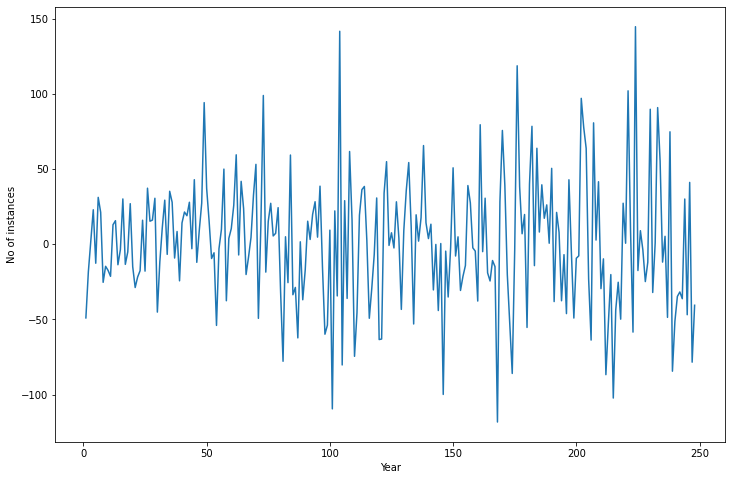

In [19]:
rel_1y2['Close_Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("No of instances")

Studied Seasonal Arima and after so many trials found the proper order for the model

In [20]:
rel_6m_model=ARIMA(rel_6m['Close'],order=(1,1,2),seasonal_order=(0,1,0,2))
rel_6m_result=rel_6m_model.fit()
print(rel_6m_result.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Close   No. Observations:                  145
Model:             ARIMA(1, 1, 2)x(0, 1, [], 2)   Log Likelihood                -755.219
Date:                          Fri, 29 Jul 2022   AIC                           1518.438
Time:                                  10:19:41   BIC                           1530.261
Sample:                                       0   HQIC                          1523.242
                                          - 145                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0318      0.108      0.294      0.768      -0.180       0.244
ma.L1         -0.0013      1.951     -0.001      0.

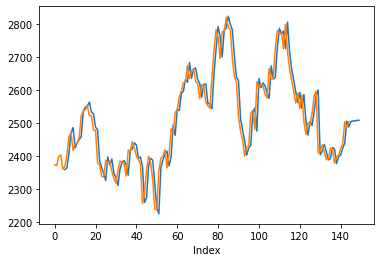

In [21]:
predictions=rel_6m_result.predict(start=5,end=len(rel_6m)+4)
predictions.plot()
rel_6m2["Close"].plot()

In [22]:
rel_1y_model=ARIMA(rel_1y['Close'],order=(1,1,2),seasonal_order=(0,1,0,2))
rel_1y_result=rel_1y_model.fit()
print(rel_1y_result.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Close   No. Observations:                  249
Model:             ARIMA(1, 1, 2)x(0, 1, [], 2)   Log Likelihood               -1275.722
Date:                          Fri, 29 Jul 2022   AIC                           2559.443
Time:                                  10:20:19   BIC                           2573.464
Sample:                                       0   HQIC                          2565.089
                                          - 249                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0200      0.068      0.296      0.768      -0.112       0.152
ma.L1         -0.0027      5.517     -0.000      1.

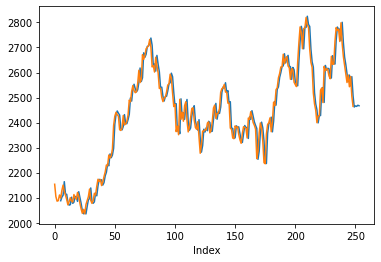

In [24]:
predictions1=rel_1y_result.predict(start=5,end=len(rel_1y)+4)
predictions1.plot()
rel_1y["Close"].plot()

The following was a fail attempt

We used the closest and most best prediction of the given data to fit and used it for the predicitons

The auto fitting was not the most accurate way to go about it as it could not even auto fit the normal data

Reason for assesing failure- The prediction gave a constant value but in fact the stock went up

Had to learn Seasonal Arima to achieve the required predictions

Using auto arima to ensure that the model is the beast fit

In [26]:
rel_6m_stepwisefit=pmdarima.arima.auto_arima(rel_6m2["Close"],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1525.088, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1526.949, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1526.948, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1523.140, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1528.949, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.840 seconds


In [27]:
rel_1y_stepwisefit=pmdarima.arima.auto_arima(rel_1y2['Close'].dropna(),trace=True,suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2565.862, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2567.810, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2567.815, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2564.080, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2569.748, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.253 seconds


In [75]:
rel_6m_model_fail=ARIMA(rel_6m['Close'],order=(0,1,0))
rel_6m_result_fail=rel_6m_model_fail.fit()
print(rel_6m_result_fail.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  145
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -760.570
Date:                Fri, 29 Jul 2022   AIC                           1523.140
Time:                        09:41:42   BIC                           1526.110
Sample:                             0   HQIC                          1524.347
                                - 145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2265.6132    203.516     11.132      0.000    1866.729    2664.498
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                13.39
Prob(Q):                              0.70   Pr

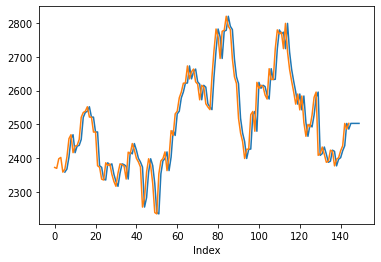

In [76]:
predictions_fail=rel_6m_result_fail.predict(start=5,end=len(rel_6m)+4)
#rel_6m2[["Close","Forecast"]].plot()
predictions_fail.plot()
rel_6m2["Close"].plot()